In [ ]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud
# !pip install python-docx


In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud
import docx 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#!pip install ipynb 
from ipynb.fs.full.preprocessor_class import Preprocessor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [4]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)


In [5]:
preprocessed_train_data.head(10)

,text
0,"[love, super, comfortable]"
1,"[shave, cremes, need, lather, feeling, fullnes..."
2,"[love, bright, color, dress, fabric, nice, fee..."
3,"[see, small, got, curve, get, fit, like, size]"
4,"[sister, love, wolf, go, wrong, cute, comfy, w..."
5,"[like, style, back]"
6,"[return, large, like, shoe, look]"
7,"[broke, hour]"
8,"[like, everybody]"
9,"[wallet, rfid, blocking, property, credit, car..."


In [6]:
preprocessed_test_data.head(10)

,text
0,"[poorly, made, shrink, fit, well]"
1,"[playing, santa, year, authentic, high, qualit..."
2,"[bought, two, one, better, shipping, schedule,..."
3,"[came, box, scratch, one, lense, know, inexpen..."
4,"[okay, kind, hard, explain, really, liked, ski..."
5,"[illustration, even, close, care, color, recei..."
6,"[size, way, regularly, wear, size, least, inch..."
7,"[chris, kyle, frog, american, sniper, legend, ..."
8,"[x, fit, small, usually, wear, x, material, th..."
9,"[ordered, watch, silver, loved, decided, order..."


In [7]:
preprocessed_train_data["text"] = preprocessed_train_data["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
print(preprocessed_train_data["text"])

preprocessed_test_data["text"] = preprocessed_test_data["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
print(preprocessed_test_data["text"])


0                                   love,super,comfortable
1        shave,cremes,need,lather,feeling,fullness,rich...
2        love,bright,color,dress,fabric,nice,feel,reall...
3                    see,small,got,curve,get,fit,like,size
4              sister,love,wolf,go,wrong,cute,comfy,wolfie
                               ...                        
44995    sandal,poorly,constructed,base,shoe,fitting,ex...
44996    wow,shirt,comfortable,fit,hug,body,softness,fr...
44997    problem,heel,pain,pf,looking,good,walking,shoe...
44998    keep,spotting,hand,everything,blue,ink,even,le...
44999                   light,died,right,away,poor,quality
Name: text, Length: 45000, dtype: object
0                             poorly,made,shrink,fit,well
1       playing,santa,year,authentic,high,quality,sant...
2       bought,two,one,better,shipping,schedule,second...
3       came,box,scratch,one,lense,know,inexpensive,un...
4       okay,kind,hard,explain,really,liked,skirt,know...
                    

In [15]:
#hiperparametrization
i = 0
best_accuracy = 0
chosen_parameters = {}
data = []
for max_features in [3000, 5000]:
  for n_gram in [(1,1),(1,2),(1,3)]:

    #initiate the TfidfVectorizer
    tfidf = TfidfVectorizer(max_features=max_features, ngram_range = n_gram)

    #convert the training and validation data to tf-idf indexes
    X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
    X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()

    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
      for tol in [ 5, 0.3, 3]:
        for C in [ 0.1, 0.3, 3, 10]:

          model = LogisticRegression(solver=solver, tol=tol, C=C)

          model.fit(X_train_tfidf, train_labels['label'])
          predictions = model.predict(X_test_tfidf)

          score = accuracy_score(test_labels['label'],predictions)

          # print('max_features: {} n_gram: {}  solver: {}  tol: {}  C: {}  accuracy: {}'.format(max_features,n_gram, solver, tol, C, score))

          if score > best_accuracy:
            best_accuracy = score
            chosen_parameters["max_features"] = max_features
            chosen_parameters["solver"] = solver
            chosen_parameters["tol"] = tol
            chosen_parameters["C"] = C
            chosen_parameters["n_gram"] = n_gram
          data.append({
            "max_features": max_features,
            "solver": solver,
            "tol": tol,
            "C": C,
            "n_gram": n_gram,
            "accuracy": score
        })          

print(best_accuracy)
print(chosen_parameters)
print(data)

C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.7045
{'max_features': 3000, 'solver': 'lbfgs', 'tol': 3, 'C': 0.3, 'n_gram': (1, 3)}
[{'max_features': 3000, 'solver': 'lbfgs', 'tol': 5, 'C': 0.1, 'n_gram': (1, 1), 'accuracy': 0.691}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 5, 'C': 0.3, 'n_gram': (1, 1), 'accuracy': 0.6958333333333333}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 5, 'C': 3, 'n_gram': (1, 1), 'accuracy': 0.6936666666666667}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 5, 'C': 10, 'n_gram': (1, 1), 'accuracy': 0.6905}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 0.3, 'C': 0.1, 'n_gram': (1, 1), 'accuracy': 0.6906666666666667}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 0.3, 'C': 0.3, 'n_gram': (1, 1), 'accuracy': 0.6958333333333333}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 0.3, 'C': 3, 'n_gram': (1, 1), 'accuracy': 0.6936666666666667}, {'max_features': 3000, 'solver': 'lbfgs', 'tol': 0.3, 'C': 10, 'n_gram': (1, 1), 'accuracy': 0.6905}, {'max_features': 3000, 'solver': 'lbfgs', '

In [23]:
model = make_pipeline(TfidfVectorizer(max_features=chosen_parameters['max_features'], ngram_range= chosen_parameters['n_gram']), LogisticRegression(solver=chosen_parameters['solver'], tol=chosen_parameters['tol'], C=chosen_parameters['C']))

model.fit(preprocessed_train_data['text'], train_labels['label'])  

predictions = model.predict(preprocessed_test_data['text'])


In [24]:
accuracy = accuracy_score(test_labels['label'], predictions)
from sklearn.metrics import classification_report

print("Accuracy:", accuracy)
print(classification_report(test_labels['label'], predictions))

Accuracy: 0.7045
              precision    recall  f1-score   support

    negative       0.70      0.82      0.75      2250
     neutral       0.54      0.34      0.42      1500
    positive       0.77      0.83      0.80      2250

    accuracy                           0.70      6000
   macro avg       0.67      0.66      0.66      6000
weighted avg       0.69      0.70      0.69      6000


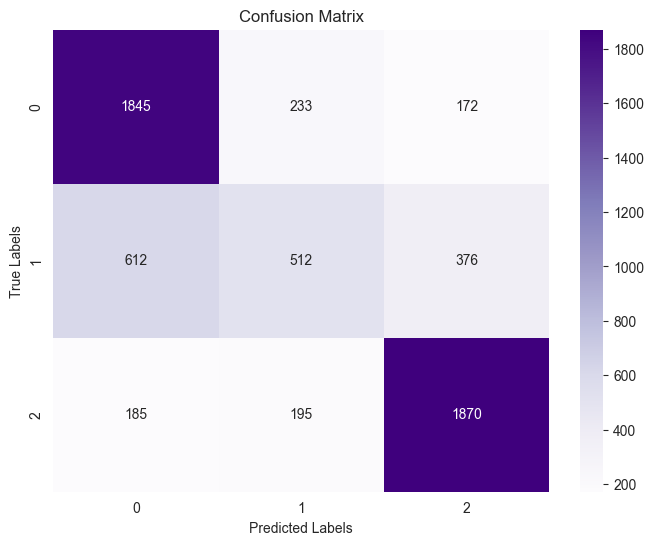

In [25]:
# !pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
doc = docx.Document() 
  
doc.add_heading('Hiperparametrization', 0) 
  
# Table data in a form of list 
# data = ( 
#     (1, 'Geek 1'), 
#     (2, 'Geek 2'), 
#     (3, 'Geek 3') 
# ) 
  
# Creating a table object 
table = doc.add_table(rows=1, cols=6) 
  
# Adding heading in the 1st row of the table 
row = table.rows[0].cells 
row[0].text = 'max_features'
row[1].text = 'n_gram'
row[2].text = 'solver'
row[3].text = 'tol'
row[4].text = 'C'
row[5].text = 'accuracy'
  
# Adding data from the list to the table 
for elem in data: 
    # Adding a row and then adding data in it. 
    row = table.add_row().cells 
    # Converting id to string as table can only take string input 
    row[0].text = str(elem['max_features']) 
    row[1].text = str(elem['n_gram'])
    row[2].text = str(elem['solver'])
    row[3].text = str(elem['tol'])
    row[4].text = str(elem['C'])
    row[5].text = str(round(elem['accuracy'],4))
    # 
# Now save the document to a location 
doc.save('gfg.docx') 